In [1]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

In [2]:
data_folder = '~/data'
BATCH_SIZE = 8
mnist_data = MNIST(data_folder, train=True, download=True, transform=transforms.ToTensor())

data_loader = DataLoader(mnist_data, batch_size=8, shuffle=False)

In [3]:
data_iterator = iter(data_loader)
images, labels = data_iterator.next()
print(len(images))
print(len(labels))

8
8


(1, 28, 28)


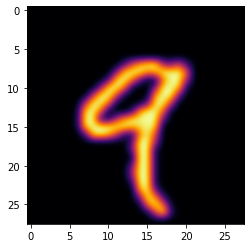

ラベル: tensor(9)


In [4]:
location = 4
data = images[location].numpy()
print(data.shape)
#print(data)
reshaped_data = data.reshape(28,28)
plt.imshow(reshaped_data, cmap="inferno", interpolation="bicubic")
plt.show()
print("ラベル:",labels[location])

In [9]:
train_data_with_labels = MNIST(data_folder, train=True, download=True, transform=transforms.ToTensor())
train_data_loader = DataLoader(train_data_with_labels, batch_size=BATCH_SIZE, shuffle=True)

test_data_with_labels = MNIST(data_folder, train=False, download=True, transform=transforms.ToTensor())
test_data_loader = DataLoader(test_data_with_labels, batch_size=BATCH_SIZE, shuffle=True)

In [10]:
print(train_data_loader.dataset)
print(test_data_loader.dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\koshi/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\koshi/data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [12]:
from torch.autograd import Variable
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        #入力層
        self.layer1 = nn.Linear(28*28, 100)
        #中間層(隠れ層)
        self.layer2 = nn.Linear(100,50)
        #出力層
        self.layer3 = nn.Linear(50,10)
    
    def forward(self, input_data):
        input_data = input_data.view(-1,28*28)
        input_data = self.layer1(input_data)
        input_data = self.layer2(input_data)
        input_data = self.layer3(input_data)
        return input_data

In [15]:
model = MLP()
import torch.optim as optimizer
#ソルトマックス：クロスエントロピー
lossResult = nn.CrossEntropyLoss()
#SSD
optimizer = optimizer.SGD(model.parameters(),lr=0.01)

In [25]:
max_epoch = 4
for epoch in range(max_epoch):
    total_loss = 0.0
    for i,data in enumerate(train_data_loader):
        train_data, teacher_labels = data
        train_data, teacher_labels = Variable(train_data),Variable(teacher_labels)
        optimizer.zero_grad()
        outputs=model(train_data)
        loss = lossResult(outputs,teacher_labels)
        loss.backward()
        
        optimizer.step()
        total_loss +=  loss.data
        
        if i % 2000 == 1999:
            print("学習進捗:[%d,%d] 学習誤差(loss):%.3f" % (epoch + 1, i+1, total_loss/2000))
            total_loss = 0.0


学習進捗:[1,2000] 学習誤差(loss):0.853
学習進捗:[1,4000] 学習誤差(loss):0.380
学習進捗:[1,6000] 学習誤差(loss):0.340
学習進捗:[2,2000] 学習誤差(loss):0.310
学習進捗:[2,4000] 学習誤差(loss):0.315
学習進捗:[2,6000] 学習誤差(loss):0.310
学習進捗:[3,2000] 学習誤差(loss):0.294
学習進捗:[3,4000] 学習誤差(loss):0.287
学習進捗:[3,6000] 学習誤差(loss):0.292
学習進捗:[4,2000] 学習誤差(loss):0.299
学習進捗:[4,4000] 学習誤差(loss):0.290
学習進捗:[4,6000] 学習誤差(loss):0.283


In [31]:
import torch
total = 0
count_when_correct = 0
for data in test_data_loader:
    test_data, teacher_labels = data
    results = model(Variable(test_data))
    _,predicted = torch.max(results.data,1)
    total += teacher_labels.size(0)
    count_when_correct += (predicted == teacher_labels).sum()
print("count_when_correct:%d"%(count_when_correct))
print("total:%d"%(total))
print("正解率:%d/%d = %f"% (count_when_correct,total,int(count_when_correct)/int(total)))

count_when_correct:9173
total:10000
正解率:9173/10000 = 0.917300
